# pandas 进阶修炼 ｜早起Python
<br>

**pandas进阶修炼系列由公众号【早起Python & 可视化图鉴】 原创**

**转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**


本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 实战｜客户流失分析



<br>


**<font color = '#5172F0'><font size=3.5>必读👇👇👇</font>**
    
**本习题微信公众号「<font color ='#F77802'>数据STUDIO</font>」号主云朵君友情提供，授权公众号「早起Python」二次整理发布**

    
### 项目目的

深入了解用户画像及行为偏好，挖掘出影响用户流失的关键因素，并通过算法预测客户访问的转化结果，从而更好地完善产品设计、提升用户体验！

### 数据说明

此次数据是携程用户一周的访问数据，为保护客户隐私，已经将数据经过了脱敏，和实际商品的订单量、浏览量、转化率等有一些差距，不影响问题的可解性。

### 案例说明

分类信息app，通过数据挖掘分析影响用户流失的关键因素、深入了解用户行为偏好以此做出调整，提升客户留存率，增强客户黏性，并通过随机森林算法预测客户流失，通过特征创造使模型分数提高2个百分点。

### 项目内容
探索数据分布，缺失情况，针对性的进行缺失值填补，对于缺失较少的重要特征选择随机森林缺失填补法，使用3sigma、箱型图分析等对异常值进行处理，对分类型变量进行编码。

使用方差过滤、F检验过滤掉一部分特征，进行WOE分箱，对每个特征分箱结果进行可视化，分析每个特征分箱情况并以此分析 用户行为偏好，使用各个特征的IV值进一步筛选特征。

训练随机森林模型，模型调参、评估，输出模型，以此模型对用户流失进行预测，以便针对性地挽留用户。训练逻辑回归模型，通过其算法可解释性强的特点(特征系数)来对用户流失关键因素进行阐述。

本次案例分析仅展示数据清洗、特征工程及建模（随机森林分类模型）部分。完整案例可参见原文。

![p1.png](./picture/p1.png)

  
    
**<font color = '#5172F0'><font size=3.5>更多资源👇👇👇</font>**   
    
如果需要获得与本案例更多的资源，可以微信搜索公众号「<font color ='#F77802'>数据STUDIO</font>」关注，或者点击下方文章链接查看！

- [分享一个能够写在简历里的企业级数据挖掘实战项目](https://mp.weixin.qq.com/s/X4b0pTrv8_6WItM1ZmHyKg)

**<font color = '#5172F0'><font size=3.5>注意事项👇👇👇</font>**  
    
**注意1**：为了尽可能还原一次真实的数据分析项目，在食用本notebook时，可能会出现我们没有提示（解决方案）的报错，你应学会如何自行解决！

**注意2**：由于本案例后半部分涉及内容大多为机器学习相关，因此将不做习题使用，提供用于pandas操作练习的部分仅到20题为止！
   
**注意3**：为了尽可能让大家理解题意，我将保留每一题的运行结果，该结果仅供参考，只要完成题目要求，在样式和文字上无需保持一致！

## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 数据导入与探索性分析

### 导入依赖包

执行以下代码来导入本项目使用到的相关库

**如果有任何导入相关的错误，大概率是因为你没有安装，根据报错提示使用 pip 安装即可。**

**导入库相关的问题不应在知识星球或者微信群进行提问！**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import datetime # 计时器
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

plt.rcParams['font.family'] = ['Arial Unicode MS']#显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False

### 1 -  导入数据

导入当前目录下 `userlostprob.txt`

### 2 - 数据查看

查看数据前几行

### 3 - 数据查看

查看数据尾部5行

### 4 - 数据抽样

随机查看 5 条数据样本

### 5 - 数据查看


查看数据形状

(689945, 51)

### 6 - 数据检查

检查数据类型

### 7 - 数据查看

查看数据基本信息

### 8 - 数据查看

查看数据的其他的一些信息（列索引与数据大小）

35187195

### 9 - 数据统计

查看数据的描述性统计

### 10 - 数据统计

按照行计算平均值

## 数据清洗
数据清洗主要包括去除重复值、处理缺失值、处理异常值、⽣成衍生变量等操作。其中处理顺序根据实际处理过程涉及的问题而定，这里的顺序仅供参考。

### 11 - 处理重复值

对于一般模型影响不大，但对于回归模型⽽言，容易导致回归系数标准误降低，使得对应p值减⼩。重复值过多，样本随机误差降低，造成参数的贡献程度会被高估。本案例没有重复值，可以略过。

(689945, 51)

### 12 - 缺失值查看

**查看缺失值比例，并排序**

### 13 - 数据可视化
使用密度图可视化数据缺失比

<AxesSubplot:xlabel='缺失比', ylabel='Density'>

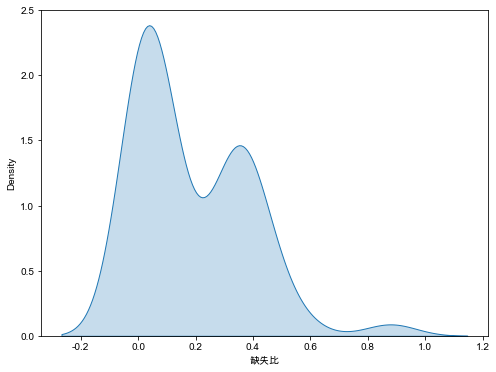

### 14 - 数据可视化

使用条形图可视化缺失值

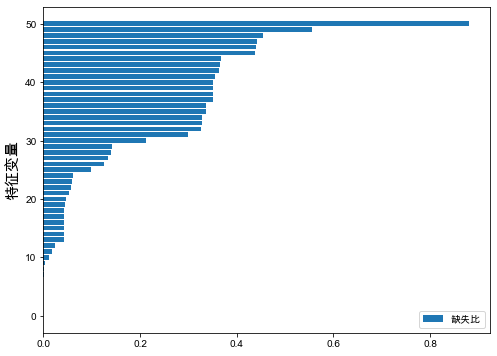

### 15 - 修改索引

将 null 的索引设置为 特征，列名为缺失比

,缺失比
特征,
label,0.000000
sid,0.000000
iforderpv_24h,0.000000
h,0.000000
d,0.000000
sampleid,0.000000
arrival,0.000000
hotelcr,0.001155
hoteluv,0.001155


### 16 - 数据删除


**删除缺失比例为0.879824**的列

### 17 - 异常值处理

首先处理异常值，最低酒店定价有小于0的，有等于1的值，明显属于异常值。异常值处理方法较多，常见有直接删除，当缺失值处理等等

本例中，我们用盖帽法处理此异常值。

In [22]:
data.describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,unique,top,freq,mean,std,min,1%,25%,50%,75%,99%,max
label,689945,NaN,NaN,NaN,0.274452,0.446238,0,0,0,0,1,1,1
sampleid,689945,NaN,NaN,NaN,628540,414681,24636,36205.9,312320,599637,887460,2.22689e+06,2.23843e+06
d,689945,7,2016-05-20,111985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival,689945,37,2016-05-20,110982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iforderpv_24h,689945,NaN,NaN,NaN,0.193737,0.395226,0,0,0,0,0,1,1
decisionhabit_user,385450,NaN,NaN,NaN,5.31705,38.5245,0,1,2,3,5,27,3167
historyvisit_totalordernum,386525,NaN,NaN,NaN,11.7105,17.2514,1,1,2,6,14,82,711
hotelcr,689148,NaN,NaN,NaN,1.061,0.0452643,1,1,1.03,1.05,1.09,1.19,3.18
ordercanceledprecent,447831,NaN,NaN,NaN,0.342119,0.35421,0,0,0,0.25,0.57,1,1
landhalfhours,661312,NaN,NaN,NaN,6.08637,12.4132,0,0,0,0,4,48,49


**定义盖帽法处理异常值**

In [23]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,318.806242,575.782415,-3.0,37.0,116.0,200.0,380.0,1823.0,100000.0
lowestprice_pre,659689.0,315.954583,463.723643,1.0,38.0,118.0,208.0,385.0,1750.0,100000.0


In [24]:
col_01 = ['lowestprice','lowestprice_pre'] # 偏态严重

In [25]:
def block_lower(x):
# x是输⼊入的Series对象,替换1%分位数
    ql = x.quantile(.01)
    out = x.mask(x<ql,ql)
    return(out)

def block_upper(x):
# x是输⼊入的Series对象,l替换99%分位数
    qu = x.quantile(.99)
    out = x.mask(x>qu,qu)
    return(out)

In [26]:
data.loc[:,col_01]=data.loc[:,col_01].apply(block_upper)

data.loc[:,col_01]=data.loc[:,col_01].apply(block_lower)

In [27]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,305.025771,297.382838,37.0,37.0,116.0,200.0,380.0,1823.0,1823.0
lowestprice_pre,659689.0,304.439507,287.192512,38.0,38.0,118.0,208.0,385.0,1750.0,1750.0


### 18 - 数据划分

In [28]:
data_copy = data.copy(deep=True) # 备份数据,deep=True是深拷贝，同浅拷贝有所不同，他不会因为备份数据改变而改变

运用切片选取数据

In [29]:
X = data_copy.iloc[:,2:]
y = data_copy.label

In [30]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=666)

### 19 - 特征筛选

将不同类型的变量进行区别对待处理

In [31]:
cols = X.columns.to_list()
col_no = ['sid','iforderpv_24h','h'] #没有缺失值的特征
col_clf = ['decisionhabit_user'] # 分类型变量
col_neg = ['delta_price1','delta_price2','customer_value_profit'
           ,'ctrip_profits','deltaprice_pre2_t1'] # 含有负数
col_35 = ['firstorder_bu','decisionhabit_user','historyvisit_totalordernum'
 ,'historyvisit_avghotelnum','customer_value_profit','ctrip_profits','ordernum_oneyear'
 ,'lasthtlordergap','ordercanceledprecent','ordercanncelednum'] # 缺失35% —— 55%

筛选方差大于100的列

In [32]:
col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100

In [33]:
col_norm = list(set(cols)-set(col_clf + col_std + col_neg + col_no +col_35))

通过remove删除列

In [34]:
col_std.remove('delta_price1')
col_std.remove('delta_price2')
col_std.remove('sampleid')
col_std.remove('lasthtlordergap')

### 20 - 缺失值填补

- 分类型变量用 '众数填补' —— col_clf
- 含有负数的特征用 '中值填补' —— col_neg
- std > 100 方差大于100的连续型变量用 '中值填补' —— col_std
- 缺失35%——55%用 '常数 -1 填充' 单独做一类
- 其余变量用 '均值填补' —— col_norm

In [35]:
Xtrain.loc[:,col_clf] = Xtrain.loc[:,col_clf].fillna(Xtrain.loc[:,col_clf].mode())

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [36]:
Xtrain.loc[:,col_neg] = Xtrain.loc[:,col_neg].fillna(Xtrain.loc[:,col_neg].median())

In [37]:
Xtrain.loc[:,col_std] = Xtrain.loc[:,col_std].fillna(Xtrain.loc[:,col_std].median())

In [38]:
Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())

In [39]:
Xtrain.loc[:,col_35] = Xtrain.loc[:,col_35].fillna(-1)

**检查缺失值填补情况**

查看训练集合的缺失值情况

In [40]:
Xtrain.isna().any().sum()

0

查看数据集合的缺失情况

In [41]:
Xtest.isna().any().sum()

43

In [42]:
# 特征创造
# ordernum_oneyear_train = Xtrain.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# ordernum_oneyear_test = Xtest.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# avgprice_train = Xtrain.loc[:,'avgprice'].reset_index(drop=True)
# avgprice_test = Xtest.loc[:,'avgprice'].reset_index(drop=True)

# M_train = ordernum_oneyear_train * avgprice_train

# M_test = ordernum_oneyear_test * avgprice_test

# M_train.to_csv('M_train.csv')
# M_test.to_csv('M_test.csv')

## 特征选择

查看正负样本均衡与否

In [43]:
y.value_counts()

0    500588
1    189357
Name: label, dtype: int64

### 方差过滤

删除日期列

In [44]:
Xtrain = Xtrain.drop(columns=['d', 'arrival'])
Xtest = Xtest.drop(columns=['d', 'arrival'])

方差过滤

In [45]:
selector = VarianceThreshold()
Xtrain_var0 = selector.fit(Xtrain).transform(Xtrain)

过滤完后查看数据形状

In [46]:
Xtrain.shape

(482961, 46)

In [47]:
Xtrain_var0.shape

(482961, 46)

### F_检验

In [48]:
F , pvalues_f = f_classif(Xtrain,Ytrain)

查看F值

In [49]:
F

array([5.91193624e+03, 1.93995904e+00, 1.10748523e+04, 6.52588756e+03,
       5.72616656e+03, 2.34402404e+02, 4.71035154e+03, 9.63228309e-01,
       3.48993536e+01, 2.69161646e+00, 2.96230367e+02, 4.45001376e+00,
       4.09092508e+01, 1.84634401e-01, 6.66912134e+02, 4.02901071e+00,
       1.31726129e+03, 6.45113345e+03, 1.24045963e+04, 6.35625789e+03,
       1.11075725e+02, 2.11018777e+03, 9.11616695e+02, 3.76655886e+02,
       9.85304381e+02, 8.61980927e+00, 2.95985745e+03, 3.59246695e+01,
       1.79738069e+02, 7.67313405e+00, 3.04910588e-02, 2.70403338e+03,
       1.18798987e+01, 1.52209921e+03, 1.52800082e+03, 1.97523458e+03,
       1.67256060e+03, 4.20295879e+02, 8.55081976e+03, 4.81856327e+03,
       4.54167636e+03, 6.54280347e+01, 1.58147894e+04, 6.31860633e+01,
       3.35011334e+02, 2.98914773e+03])

查看p值

In [50]:
pvalues_f

array([0.00000000e+000, 1.63673622e-001, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 6.72579265e-053, 0.00000000e+000, 3.26375337e-001,
       3.47427483e-009, 1.00878081e-001, 2.28516134e-066, 3.49014787e-002,
       1.59609407e-010, 6.67420584e-001, 5.90640741e-147, 4.47247156e-002,
       4.92139290e-288, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.73245469e-026, 0.00000000e+000, 4.50308055e-200, 7.16278251e-084,
       4.64497778e-216, 3.32542335e-003, 0.00000000e+000, 2.05240027e-009,
       5.62279399e-041, 5.60511624e-003, 8.61380748e-001, 0.00000000e+000,
       5.67478538e-004, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.30633608e-093, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 6.04130835e-016, 0.00000000e+000, 1.88475684e-015,
       8.25479550e-075, 0.00000000e+000])

**与标签没有显著相关性的变量有7个**

In [51]:
(pvalues_f>0.01).sum()

7

**剔除没有相关性的变量**

In [52]:
col_f = list(Xtrain.columns[pvalues_f<0.01])
col_f

['iforderpv_24h',
 'historyvisit_totalordernum',
 'hotelcr',
 'ordercanceledprecent',
 'landhalfhours',
 'ordercanncelednum',
 'starprefer',
 'consuming_capacity',
 'cancelrate',
 'delta_price1',
 'hoteluv',
 'businessrate_pre',
 'ordernum_oneyear',
 'cr_pre',
 'avgprice',
 'lowestprice',
 'firstorder_bu',
 'customereval_pre2',
 'delta_price2',
 'commentnums_pre',
 'customer_value_profit',
 'commentnums_pre2',
 'cancelrate_pre',
 'novoters_pre2',
 'ctrip_profits',
 'deltaprice_pre2_t1',
 'lowestprice_pre',
 'uv_pre',
 'uv_pre2',
 'lowestprice_pre2',
 'lasthtlordergap',
 'businessrate_pre2',
 'cityuvs',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [53]:
Xtrain = Xtrain.loc[:,col_f] # 通过切片筛选所需要的数据
Xtest = Xtest.loc[:,col_f]

重置索引

In [54]:
Xtrain.index = range(Xtrain.shape[0]) # 重置索引
Ytrain = Ytrain.reset_index(drop=True)
Xtest.index = range(Xtest.shape[0]) # 重置索引

Ytest = Ytest.reset_index(drop=True)

### 嵌入法筛选特征

In [55]:
# 初步探索
RFC_clf = RFC(n_estimators=10,random_state=0)
X_embedded = SelectFromModel(RFC_clf,threshold=0.05).fit_transform(Xtrain,Ytrain)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


**利用随机森林调出特征重要性**

In [56]:
importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_

同样，结束后查看下数据的形状

In [57]:
Xtrain.shape

(482961, 39)

In [58]:
Ytrain.shape

(482961,)

**嵌入法画学习曲线**

利用随机森林特征重要性属性feature_importances_定义阈值范围，以嵌入选择模型SelectFromModel为基础，通过交叉验证cross_val_score得到每个阈值下模型得分情况。

22:12:988578


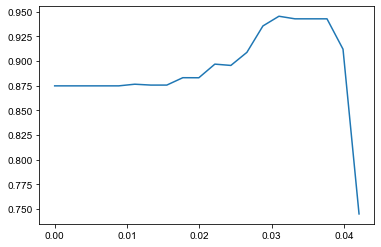

In [59]:
importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_
threshold = np.linspace(0,importance.max(),20)
score = []
time0 = time()
for i in threshold:
    X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain,Ytrain)
    val = cross_val_score(RFC_clf,X_embedded,Ytrain,cv=5).mean()
    score.append(val)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.plot(threshold,score)
plt.show();

In [60]:
np.max(score) #最高分

0.9453910343465477

最高分对应的重要性阈值

In [61]:
threshold[np.argmax(score)]

0.031000416340192495

In [62]:
X_embedded = SelectFromModel(RFC_clf,threshold=0.031000416340192495).fit_transform(Xtrain,Ytrain)

In [63]:
col_k = list(Xtrain.columns[RFC_clf.feature_importances_>0.031000416340192495])

**利用阈值选择出 8 个特征**

In [64]:
col_k_ = ['lasthtlordergap',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

将数组转行为DataFrame数据框

In [65]:
Xtrain_new = pd.DataFrame(X_embedded,columns = col_k )
Xtrain_new.head()

,lasthtlordergap,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,713.0,5.387,0.680,312.0,1.14,111.0,2162.0,18.0
1,97890.0,3.853,0.027,3594.0,1.00,54.0,1397.0,22.0
2,4601.0,11.573,0.813,299.0,1.07,385.0,2881.0,15.0
3,-1.0,10.567,3.033,1273.0,1.00,37.0,1218.0,15.0
4,52076.0,0.160,0.013,31216.0,2.00,61.0,318.0,5.0


通过切片索引需要的列，重置索引，并查看前5行

In [66]:
Xtest_new = Xtest.loc[:,col_k_].reset_index(drop=True).head()

查看每个列之间的相关性

**过滤高度相关的特征**
热图用于特征间的相关性分析，通过绘制热图，分析发现有以下两个高度相关的变量，最终删除特征cityuvs。

<AxesSubplot:>

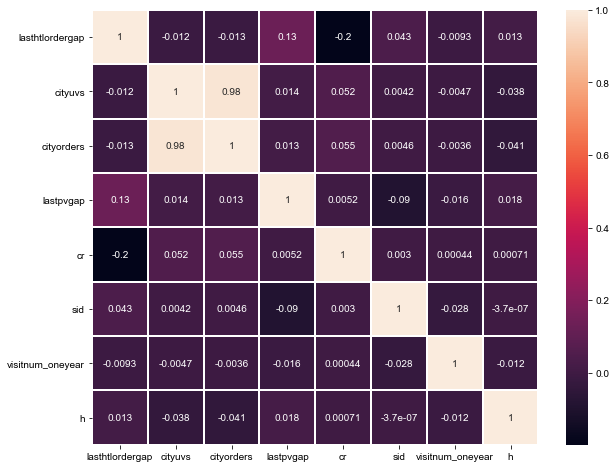

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(Xtrain_new.corr(),annot=True,linewidths=1)

发现cityorders 与 cityuvs 高度相关，删除其中一个列

In [ ]:
Xtrain_new.drop(columns='cityuvs',axis=1,inplace=True)
Xtest_new.drop(columns='cityuvs',axis=1,inplace=True)

**保存清洗后的数据**

In [ ]:
Xtrain_new.to_csv('Xtrain_new.csv')
Xtest_new.to_csv('Xtest_new.csv')
Ytrain.to_csv('Ytrain.csv')
Ytest.to_csv('Ytest.csv')

## 建模与调参

### 弱评估器选择

23:04:214531
0.7180918548591728 0


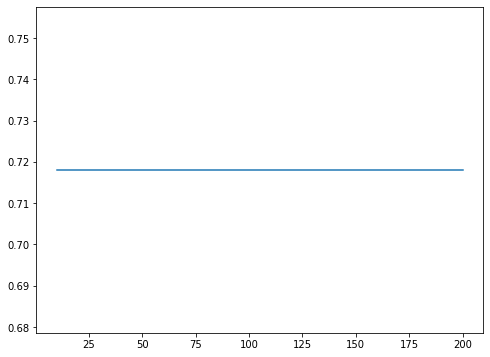

In [50]:
score = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=3
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(max(score),np.argmax(score))
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score)
plt.show();

### 最大深度选择

05:41:132984
得分： 0.8939818849773287 最大深度： 20


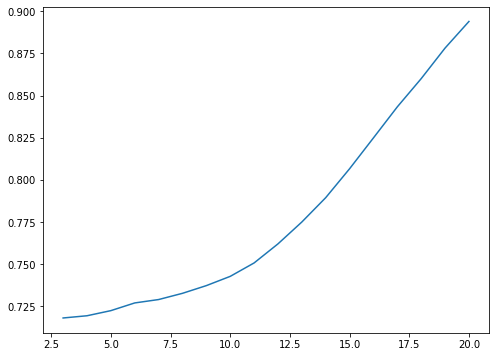

In [79]:
score = []
time0 = time()
for i in np.arange(3, 21, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score),'最大深度：',np.arange(3, 21, 1)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(3, 21, 1),score)
plt.show();

### 最小分割样本数选择

08:21:638368
得分： 0.8066083426188453 最小分支数： 2


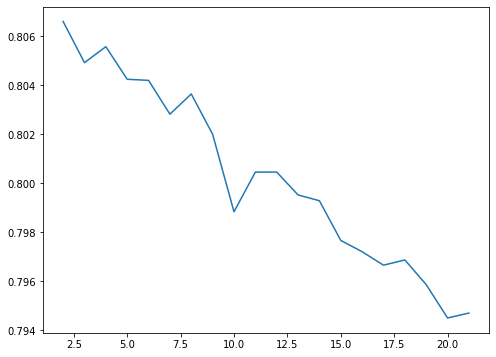

In [80]:
score_2 = []
time0 = time()
for i in np.arange(2, 22, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_2.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score_2),'最小分支数：',np.arange(2, 22, 1)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22, 1),score_2)
plt.show();

### 最小叶子结点样本数选择

04:14:709608
得分： 0.8066083426188453 最小叶子数： 1


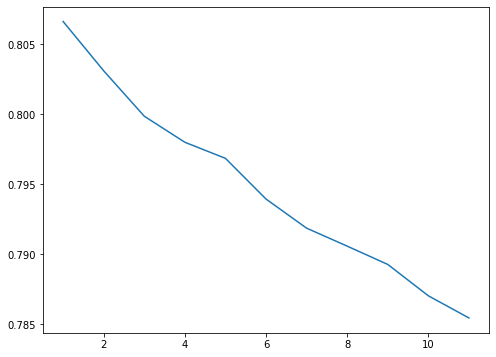

In [81]:
score_3 = []
time0 = time()
for i in np.arange(1, 12, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 15
             ,min_samples_split= 2
             ,min_samples_leaf = i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_3.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('得分：',max(score_3),'最小叶子数：',np.arange(1, 12, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 12, 1),score_3)
plt.show();

### 最小评估器再次选择

31:49:492826
0.9043809229615084 最佳分类器数： 180


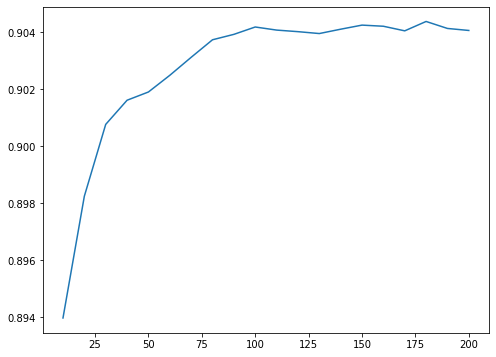

In [102]:
score_4 = []
time0 = time()
for i in range(10,201,10):
    rfc = RFC(n_estimators= i
             ,max_depth=20
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_4.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))
print(max(score_4),'最佳分类器数：',range(10,201,10)[np.argmax(score_4)])
plt.figure(figsize=(8,6))
plt.plot(range(10,201,10),score_4)
plt.show();
# 运行1个半小时

### 确定参数

In [106]:
clf = RFC(n_estimators=180
         ,max_depth=15
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

查看训练集和测试集的分数

In [107]:
clf.score(Xtrain_new,ytrain)

0.8311662235362908

In [108]:
clf.score(Xtest_new,ytest)

0.8119391458799907

In [109]:
 clf = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [110]:
clf.score(Xtrain_new,ytrain)

0.9425305870282317

In [111]:
clf.score(Xtest_new,ytest)

0.9049398923983833

另一种方法使用网格搜素，但不建议使用，耗时特别长

In [ ]:
# from sklearn.model_selection import GridSearchCV 
# time0 = time()
# rfc = RFC(n_estimators= 10
#           ,random_state=0)
# GS = GridSearchCV(rfc,param_grid,cv=5)
# GS.fit(Xtrain_new,ytrain)
# print('最佳参数：',GS.best_params_)
# print('最高得分：',GS.best_score_)
# print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))

查看特征重要性

In [112]:
clf.feature_importances_

array([0.12778966, 0.13655849, 0.12457015, 0.13714743, 0.10208397,
       0.13347588, 0.14272563, 0.09564879])

定义函数绘制AUC曲线

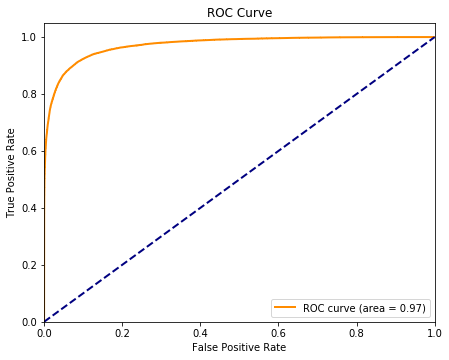

In [116]:
model = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
# ROC
y_score = model.fit(Xtrain_new, ytrain).predict_proba(Xtest_new)  # 随机森林
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

公众号【数据STUDIO】以Python为核心语言，垂直于数据科学领域，分享大量知识总结及实战项目经验分享，包括数据分析、可视化、机器学习、数据挖掘等领域，从入门到进阶！每篇文章源数据和源码均可免费获取！

![数据STUDIO](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/17/shu-justudio.jpg?域名/sample.jpg?x-oss-process=style/stylename)

![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/16/16317972442543.jpg?域名/sample.jpg?x-oss-process=style/stylename)